In [1]:
# ROC 只能用于二分类
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
# pos_label 正例类的标签
# fpr假正例率, tpr真正例率, thresholds用于计算fpr和tpr的决策函数的阈值递减
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)

In [2]:
print(fpr)
print(tpr)
print(thresholds)

[0.  0.  0.5 0.5 1. ]
[0.  0.5 0.5 1.  1. ]
[1.8  0.8  0.4  0.35 0.1 ]


In [7]:
# ROC 例子
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# 导入数据
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 将输出二值化
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#  增加一些噪音特征让问题变得更难一些
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# 打乱并分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# 学习，预测
classifier = OneVsRestClassifier(svm.SVC(kernel='linear',
                                         probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# 计算每个类别的 ROC 曲线和 AUC 面积
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 计算ROC曲线和AUC面积的微观平均（micro-averaging）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

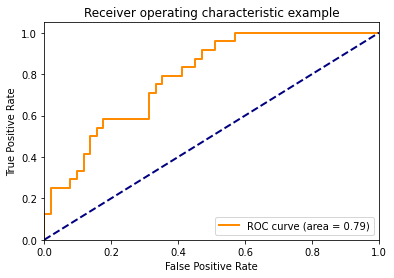

In [8]:
# 绘制其中一个具体类别的 ROC 曲线
plt.figure()
lw = 2  # 线宽
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()